# Example usage of the `Prec6dq10_20M`, `Prec7dq10_20M` fitting models

`Prec6dq10_20M` models ampitudes of the ringdown from a quasi-circular, precessing black-hole binary. It is calibrated up to mass ratio 10 and at a starting time $t_{\rm start}=20M$ from $t_{\rm EMOP}$.  

Alongside GPR models for mode amplitude values, we provide models calibrated on the Leave-One-Out cross-validation absolute error on mode amplitude. These can be used to estimate model uncertainty on the predicted values. GPR natively provides a mean value $\mu_{\rm GPR}$ and an uncertainty estimate $\sigma_{\rm GPR}$, but, as we explain in the paper, this only describes "epistemic uncertainy", and should be considered with caution.  

We also provide 6D and 7D models of $\Delta t_{\rm EMOP}$, which is the distance in time between $t_{\rm EMOP}$ and the total waveform peak $t_{\rm peak\_norm} = \max\limits_{t} \sqrt{\sum_{l,m}\left| h_{l,m} \right|^2}$

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import postmerger as pm

## Load fit

In [2]:
fit_6d = pm.load_fit('Prec6dq10_20M')
fit_6d

Prec6dq10_20M models amplitudes of the ringdown from a quasi-circular, precessing black-hole binary.
It is calibrated up to mass ratio 10 and at a starting time 20M from t_emop of the simulation.
It also provides an uncertainty estimate calibrated on the cross-validation absolute error on the amplitude values.

## Read documentation

In [3]:
help(fit_6d)

Help on AmplitudeFitPrec6dq10 in module postmerger._fits object:

class AmplitudeFitPrec6dq10(builtins.object)
 |  AmplitudeFitPrec6dq10(fit_dict)
 |
 |  Methods defined here:
 |
 |  __init__(self, fit_dict)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __print__(self)
 |
 |  __repr__(self)
 |      Return repr(self).
 |
 |  predict_abs_err(self, delta, chi_s, chi_a, rem_spin_angle, kick_angle, kick_vel, lm, mode, return_std=False, start_time=None, final_mass_val=None, final_spin_val=None)
 |      Predict the cross-validation absolute error on A_lm corresponding to the query points.
 |      Mode (2,0) is not circularly polarized. lm=(2,0) corresponds to the real part, while lm=(2,10) corresponds to the imaginary part.
 |
 |      Parameters
 |      ----------
 |      mass_ratio : array_like of shape (n_samples,) or float
 |          Mass ratio of the query points.
 |
 |      chi1z : array_like of shape (n_samples,) or float
 |          Projection along the

## Predict amplitudes

Since $(2,0)$ mode is not circularly poalrized, we model the real and imaginary parts as different modes. To maintain a consistent notation, we identify $Re(2,0)$ with $(l=2,m=0)$ and $Im(2,0)$ with $(l=2,m=10)$.

In [4]:
## inspect available modes
## syntax: {(l,m): lm_modes}
fit_6d.modes

{(2, 2): [(2, 2, 0)],
 (2, 0): [(2, 0, 0)],
 (2, 10): [(2, 10, 0)],
 (2, 1): [(2, 1, 0)],
 (3, 3): [(3, 3, 0)]}

In [5]:
#####################################
## 6D model

## binary parameters
mass_ratio = 1.5 # defined to be >=1
chi1z = 0.1
chi2z = 0.3
theta_f = 0.2 # Angle between remnant spin and orbital angular momentum at ISCO
phi_k = 0. # Angle between remnant spin and the recoil kick velocity
v_k = 0.1 # Magnitude of the recoil kick velocity

## Utility functions
delta = pm.delta_from_q(mass_ratio)
chi_s = pm.chi_s_from_spins(mass_ratio,chi1z,chi2z)
chi_a = pm.chi_a_from_spins(mass_ratio,chi1z,chi2z)

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

## predict
amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=False)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print('6D model')
print(f'Mode {mode}:\t  {amp[0]:.3f}(+/-){abs_err[0]/2:.3f}')

Amplitude (+/-) abs_err/2
6D model
Mode (2, 2, 0):	  0.118(+/-)0.003


By default, predicitions are returned at a starting time $20M$ after $t_{\rm EMOP}$. You can retrodict (or postdict) the predictions to a different starting time using the `start_time` argument, after providing the remnant spin and mass:

In [6]:
## start time in units of the initial total mass M
start_time = 10
final_mass_val = 0.90
final_spin_val = 0.90
## predict
amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode, 
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print(f'Mode {mode}:\t  {amp[0]:.3f}(+/-){abs_err[0]/2:.3f}')

Amplitude (+/-) abs_err/2
Mode (2, 2, 0):	  0.243(+/-)0.006


## Batch evaluation

In [7]:
## binary parameters
## Utility functions
delta = np.linspace(0,0.6,50)
chi_s = 0.
chi_a = 0.
theta_f = 0.5# Angle between remnant spin and orbital angular momentum at ISCO
phi_k = np.flip(np.linspace(0,np.pi,50)) # Angle between remnant spin and the recoil kick velocity
v_k = 0.0025 # Magnitude of the recoil kick velocity

In [8]:

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

## predict
amp, sigma_amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=True)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,return_std=False)

samples = fit_6d.sample_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode, n_samples = 5)

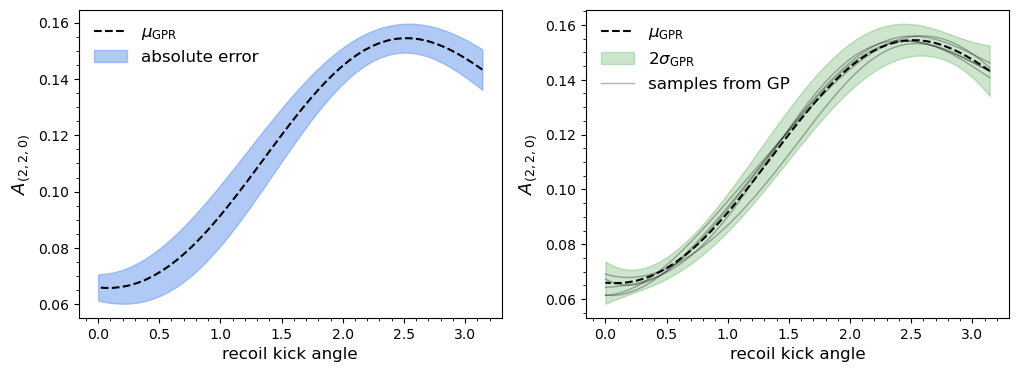

In [9]:

fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = phi_k

ax = axs[0]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-abs_err,amp+abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel('recoil kick angle',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)

ax = axs[1]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-2*sigma_amp,amp+2*sigma_amp,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel('recoil kick angle',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)

## Prediction of $t_{\rm EMOP}$ 

In [10]:
## binary parameters
## Utility functions
delta = np.linspace(0,0.8,50)
chi_s = np.flip(np.linspace(-1.,1.,50))
chi_a = np.flip(np.linspace(-1.,1.,50))
theta_f = 0.5# Angle between remnant spin and orbital angular momentum at ISCO
phi_k = np.pi/2 # Angle between remnant spin and the recoil kick velocity
v_k = 0.0025 # Magnitude of the recoil kick velocity

In [11]:

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

## predict
temop, sigma_temop = fit_6d.predict_t_emop(delta, chi_s, chi_a, theta_f, phi_k, v_k ,return_std=True)
temop_abs_err = fit_6d.predict_t_emop_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,return_std=False)

samples = fit_6d.sample_t_emop(delta, chi_s, chi_a, theta_f, phi_k, v_k ,n_samples = 5)

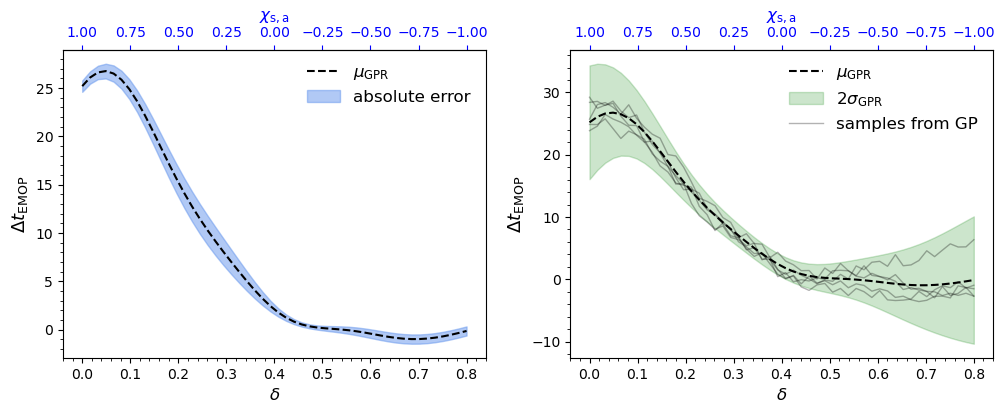

In [12]:
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d
fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = delta
varying2 = chi_s

ax = axs[0]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-temop_abs_err,temop+temop_abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{\rm s,a}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')

ax = axs[1]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-2*sigma_temop,temop+2*sigma_temop,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{\rm s,a}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')

# 7D model example

In [13]:
fit_7d = pm.load_fit('Prec7dq10_20M')
fit_7d

Prec7dq10_20M models amplitudes of the ringdown from a quasi-circular, precessing black-hole binary.
It is calibrated up to mass ratio 10 and at a starting time 20M from t_emop of the simulation.
It also provides an uncertainty estimate calibrated on the cross-validation absolute error on the amplitude values.

In [14]:
#####################################
## 7D model

## binary parameters
mass_ratio = 1.5 # defined to be >=1
delta = pm.delta_from_q(mass_ratio)

chi1x = 0.1
chi1y = 0.1
chi1z = 0.1
chi2x = 0.3
chi2y = 0.3
chi2z = 0.3

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

## predict
amp = fit_7d.predict_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=False)
abs_err = fit_7d.predict_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print('7D model')
print(f'Mode {mode}:\t  {amp[0]:.3f}(+/-){abs_err[0]/2:.3f}')

Amplitude (+/-) abs_err/2
7D model
Mode (2, 2, 0):	  0.137(+/-)0.004


In [15]:
## start time in units of the initial total mass M
start_time = 10
final_mass_val = 0.90
final_spin_val = 0.90
## predict
amp = fit_6d.predict_amp(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode,
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)
abs_err = fit_6d.predict_abs_err(delta, chi_s, chi_a, theta_f, phi_k, v_k ,lm,mode, 
                    final_mass_val=final_mass_val,
                    final_spin_val=final_spin_val,
                    start_time=start_time, return_std=False)

## results
print('Amplitude (+/-) abs_err/2')
print(f'Mode {mode}:\t  {amp[0]:.3f}(+/-){abs_err[0]/2:.3f}')

Amplitude (+/-) abs_err/2
Mode (2, 2, 0):	  0.266(+/-)0.007


## Batch evaluation

In [16]:
delta = np.linspace(0,0.8,50)
chi1x = 0.1
chi1y = 0.1
chi1z = 0.1
chi2x = 0.1
chi2y = 0.3
chi2z = 0.3

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

amp, sigma_amp = fit_7d.predict_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=True)
abs_err = fit_7d.predict_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, return_std=False)

samples = fit_7d.sample_amp(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, lm, mode, n_samples=5)


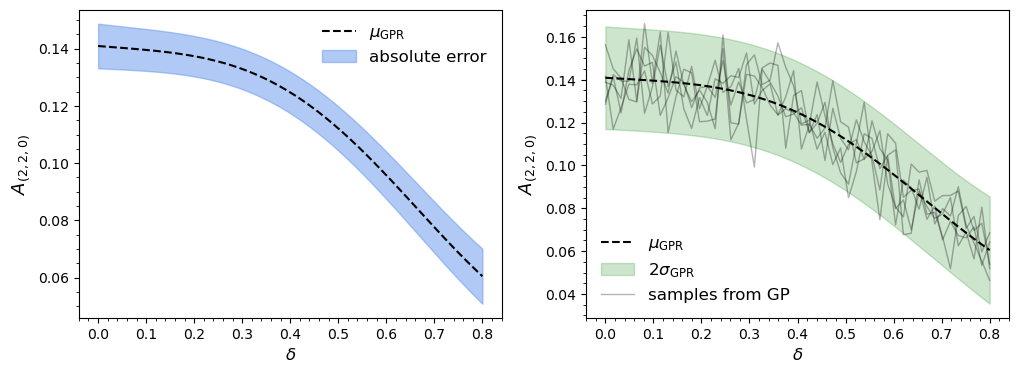

In [17]:

fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = delta

ax = axs[0]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-abs_err,amp+abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)

ax = axs[1]
ax.plot(varying,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,amp-2*sigma_amp,amp+2*sigma_amp,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(f'$A_{{{mode}}}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)

## Prediction of $t_{\rm EMOP}$ 

In [18]:
delta = np.linspace(0,0.8,50)
chi1x = 0.
chi1y = 0.
chi1z = np.flip(np.linspace(-1.,1.,50))
chi2x = 0.1
chi2y = 0.
chi2z = 0.

## spherical-harmonic indices
lm = (2,2)

## mode indices
mode = (2,2,0)

temop, sigma_temop = fit_7d.predict_t_emop(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, return_std=True)
temop_abs_err = fit_7d.predict_t_emop_abs_err(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, return_std=False)

samples = fit_7d.sample_t_emop(delta, chi1x, chi1y, chi1z, chi2x, chi2y, chi2z, n_samples=5)


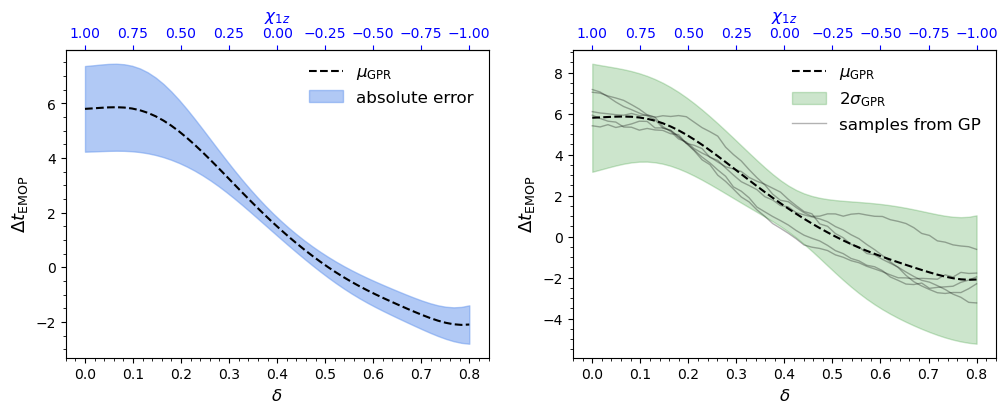

In [19]:
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d
fig, axs = plt.subplots(1,2,figsize=(12,4))

varying = delta
varying2 = chi1z

ax = axs[0]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-temop_abs_err,temop+temop_abs_err,alpha=0.5,\
                 color='cornflowerblue',label='absolute error')
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{1z}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')

ax = axs[1]
ax.plot(varying,temop,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
ax.fill_between(varying,temop-2*sigma_temop,temop+2*sigma_temop,alpha=0.2,\
                 color='green',label=r'$2\sigma_{\rm GPR}$')
ax.plot(varying, samples[:,0], ls='-', c='k', lw=1, alpha=0.3, label='samples from GP')
ax.plot(varying, samples[:,1:], ls='-', c='k', lw=1, alpha=0.3,)
ax.set_xlabel(r'$\delta$',fontsize=12)
ax.set_ylabel(r'$\Delta t_{\rm EMOP}$',fontsize=13)
ax.minorticks_on()
ax.legend(fontsize=12,frameon=False)
# Create secondary x-axis
fwd = interp1d(varying, varying2, kind='linear', fill_value='extrapolate')
inv = interp1d(varying2, varying, kind='linear', fill_value='extrapolate')
secax = ax.secondary_xaxis('top', functions=(fwd, inv))
secax.set_xlabel(r'$\chi_{1z}$', fontsize=12, color='b')
secax.tick_params(labelsize=10, colors='b')